<a href="https://colab.research.google.com/github/sonam-pankaj95/IkigAI/blob/main/interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pandas numpy scikit-learn tensorflow matplotlib seaborn


     |████████████████████████████████| 11.2 MB 9.5 MB/s 
     |████████████████████████████████| 462 kB 61.8 MB/s 
     |████████████████████████████████| 899 kB 42.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install --upgrade machine-learning-datasets
!pip install --upgrade catboost alibi shap witwidget

     |████████████████████████████████| 60.5 MB 56 kB/s 
     |████████████████████████████████| 7.1 MB 25.1 MB/s 
     |████████████████████████████████| 165 kB 55.9 MB/s 
     |████████████████████████████████| 312 kB 5.5 MB/s 
     |████████████████████████████████| 49 kB 4.3 MB/s 
     |████████████████████████████████| 394.5 MB 37 kB/s 
     |████████████████████████████████| 28.0 MB 1.2 MB/s 
     |████████████████████████████████| 132 kB 30.9 MB/s 
     |████████████████████████████████| 3.8 MB 42.5 MB/s 
     |████████████████████████████████| 462 kB 58.0 MB/s 
     |████████████████████████████████| 2.9 MB 47.5 MB/s 
     |████████████████████████████████| 14.8 MB 35.0 MB/s 
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3640 sha256=c9318e54833f428e28867a3604914d847b1f757885d8f3535d62f65ff12bf43e
  Stored in directory: /root/.cache/pip/wheels/cc/0d/0a/06236a41d8f5c3485c1057262de55329e227a0c239fd00d0cd
  Created wheel for spacy-lookups-data: filename=

     |████████████████████████████████| 76.1 MB 55 kB/s 
     |████████████████████████████████| 398 kB 45.9 MB/s 
     |████████████████████████████████| 564 kB 46.3 MB/s 
     |████████████████████████████████| 1.5 MB 41.3 MB/s 
     |████████████████████████████████| 3.8 MB 39.7 MB/s 
     |████████████████████████████████| 67 kB 4.7 MB/s 
     |████████████████████████████████| 895 kB 46.6 MB/s 
     |████████████████████████████████| 6.5 MB 43.8 MB/s 
     |████████████████████████████████| 596 kB 53.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: alibi
    Found existing installation: alibi 0.5.8
    Uninstalling alibi-0.5.8:
      Successfully uninstalled alibi-0.5.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
machine-l

In [ ]:
import math
import machine_learning_datasets as mldatasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from catboost import CatBoostClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from alibi.utils.mapping import ohe_to_ord, ord_to_ohe
from alibi.explainers import AnchorTabular
from alibi.explainers import CEM
from alibi.explainers import CounterFactualProto
import shap
import witwidget
from witwidget.notebook.visualization import WitWidget, WitConfigBuilder

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [ ]:
tf.compat.v1.disable_eager_execution()
print('Eager execution enabled: ', tf.executing_eagerly()) 

Eager execution enabled:  False


In [ ]:
tf.compat.v1.disable_eager_execution()
print('Eager execution enabled: ', tf.executing_eagerly()) 

Eager execution enabled:  False


In [ ]:
recidivism_df = mldatasets.load("recidivism-risk", prepare=True)


https://storage.googleapis.com/what-if-tool-resources/computefest2019/cox-violent-parsed_filt.csv downloaded to /content/data/cox-violent-parsed_filt.csv
1 dataset files found in /content/data folder
parsing /content/data/cox-violent-parsed_filt.csv


In [ ]:
recidivism_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14788 entries, 0 to 18315
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age                    14788 non-null  int8 
 1   juv_fel_count          14788 non-null  int8 
 2   juv_misd_count         14788 non-null  int8 
 3   juv_other_count        14788 non-null  int64
 4   priors_count           14788 non-null  int8 
 5   is_recid               14788 non-null  int8 
 6   sex_Female             14788 non-null  uint8
 7   sex_Male               14788 non-null  uint8
 8   race_African-American  14788 non-null  uint8
 9   race_Asian             14788 non-null  uint8
 10  race_Caucasian         14788 non-null  uint8
 11  race_Hispanic          14788 non-null  uint8
 12  race_Native American   14788 non-null  uint8
 13  race_Other             14788 non-null  uint8
 14  c_charge_degree_(F1)   14788 non-null  uint8
 15  c_charge_degree_(F2)   14788 non-nul

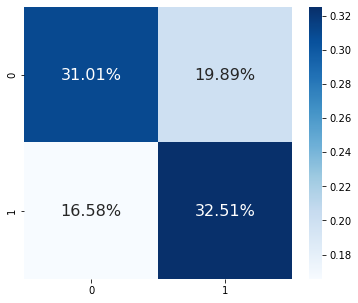

In [ ]:
cf_matrix = metrics.confusion_matrix(recidivism_df.is_recid,\
                                     recidivism_df.compas_score)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,\
            fmt='.2%', cmap='Blues', annot_kws={'size':16})

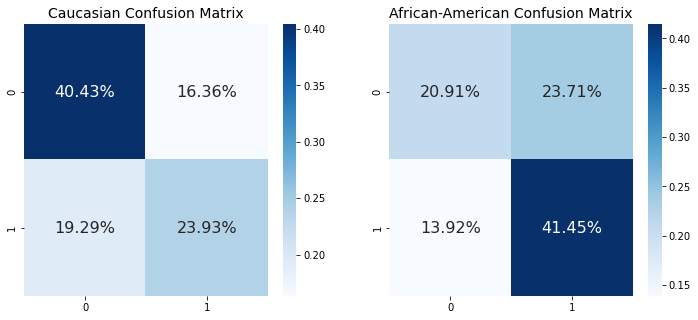

	African-American FPR:	53.1%
	Caucasian FPR:		28.8%
	Ratio FPRs:		1.84 x


In [ ]:
recidivism_c_df = recidivism_df[recidivism_df['race_Caucasian'] == 1]
recidivism_aa_df = recidivism_df[recidivism_df['race_African-American'] == 1]

_ = mldatasets.\
      compare_confusion_matrices(recidivism_c_df.is_recid, 
                                 recidivism_c_df.compas_score,\
                                 recidivism_aa_df.is_recid,\
                                 recidivism_aa_df.compas_score,\
                                 'Caucasian', 'African-American', compare_fpr=True)

In [ ]:
rand = 9
np.random.seed(rand)
tf.random.set_seed(rand)

y = recidivism_df['compas_score']
X = recidivism_df.drop(['compas_score', 'is_recid'], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand)

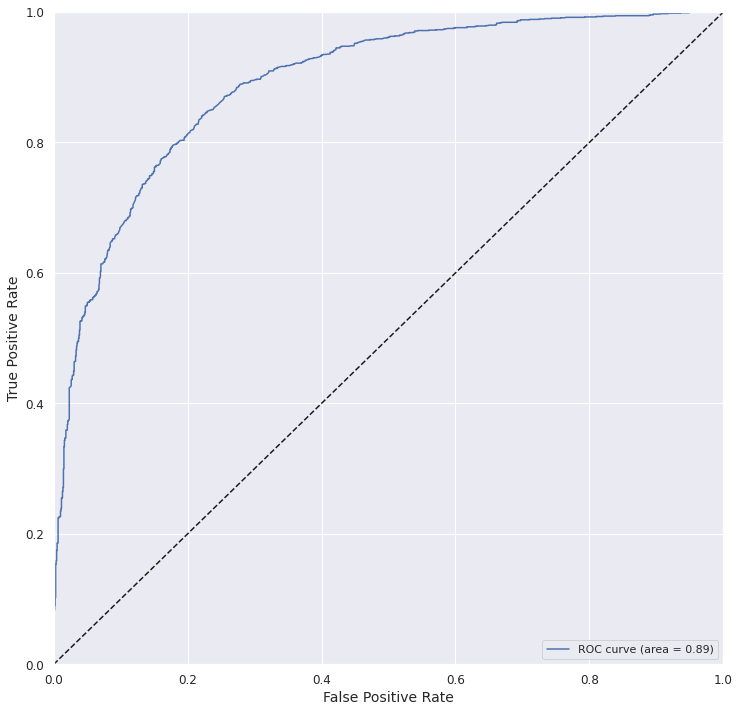

Accuracy_train:  0.8790		Accuracy_test:   0.8063
Precision_test:  0.8261		Recall_test:     0.8078
ROC-AUC_test:    0.8909		F1_test:         0.8169		MCC_test: 0.6115


In [ ]:
orig_plt_params = plt.rcParams
sns.set()
cb_mdl = CatBoostClassifier(iterations=500, learning_rate=0.5, depth=8)
fitted_cb_mdl = cb_mdl.fit(X_train, y_train, verbose=False)
y_train_cb_pred, y_test_cb_prob, y_test_cb_pred =\
        mldatasets.evaluate_class_mdl(fitted_cb_mdl, X_train,\
                                      X_test, y_train, y_test)

In [ ]:
!pip install --upgrade pandas numpy tqdm scikit-learn lightgbm xgboost networkx pydot matplotlib seaborn


     |████████████████████████████████| 15.7 MB 7.0 MB/s 
     |████████████████████████████████| 24.8 MB 44.9 MB/s 
     |████████████████████████████████| 2.0 MB 35.0 MB/s 
     |████████████████████████████████| 173.6 MB 6.1 kB/s 
  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
 

In [ ]:
!pip install --upgrade machine-learning-datasets
!pip install --upgrade econml dowhy
!pip install --no-deps git+https://github.com/EthicalML/xai.git
!pip install aif360==0.3.0
!pip install BlackBoxAuditing==0.1.54

  Using cached alibi-0.5.8-py3-none-any.whl (312 kB)
  Using cached scikit_learn-0.22.2.post1-cp37-cp37m-manylinux1_x86_64.whl (7.1 MB)
  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
  Attempting uninstall: alibi
    Found existing installation: alibi 0.6.5
    Uninstalling alibi-0.6.5:
      Successfully uninstalled alibi-0.6.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22.2.post1 which is incompatible.
imbalanced-learn 0.8.1 requires 

     |████████████████████████████████| 3.3 MB 4.1 MB/s 
     |████████████████████████████████| 164 kB 39.6 MB/s 
     |████████████████████████████████| 77 kB 3.4 MB/s 
     |████████████████████████████████| 356 kB 15.6 MB/s 
     |████████████████████████████████| 123 kB 33.8 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491650 sha256=04db55ac7b8c329c53bd43f3c2be1df194478e3a581ae985026c5320c12295ca
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap
  Attempting uninstall: shap
    Found existing installation: shap 0.40.0
    Uninstalling shap-0.40.0:
      Successfully uninstalled shap-0.40.0


  Cloning https://github.com/EthicalML/xai.git to /tmp/pip-req-build-cyhqogqb
  Running command git clone -q https://github.com/EthicalML/xai.git /tmp/pip-req-build-cyhqogqb
  Created wheel for xai: filename=xai-0.1.0-py3-none-any.whl size=349032 sha256=93137a30dc1e05e234d8977ba25c94db132727a1af0e5a104dca0a9a63ecdab0
  Stored in directory: /tmp/pip-ephem-wheel-cache-eqkhnfbo/wheels/e9/c9/2c/db30b1608d79231b31dfc0dd5defac87b079ffb9fbee6ded4b
Successfully built xai
     |████████████████████████████████| 2.6 MB 7.9 MB/s 
  Created wheel for BlackBoxAuditing: filename=BlackBoxAuditing-0.1.54-py2.py3-none-any.whl size=1394770 sha256=cfea6e45c91713998eca7157d15f0ceef1785397aab2b82ad0e15cf43dae4bad
  Stored in directory: /root/.cache/pip/wheels/05/9f/ee/541a74be4cf5dad17430e64d3276370ea7b6a834a76cb4215a
Successfully built BlackBoxAuditing


In [ ]:
import math
import os
import warnings
warnings.filterwarnings("ignore")
import machine_learning_datasets as mldatasets
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

from sklearn import model_selection, tree, metrics
import lightgbm as lgb
import xgboost as xgb

from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.preprocessing import DisparateImpactRemover
from aif360.algorithms.inprocessing import PrejudiceRemover
from aif360.algorithms.inprocessing import GerryFairClassifier
from aif360.algorithms.postprocessing.calibrated_eq_odds_postprocessing import CalibratedEqOddsPostprocessing
from aif360.algorithms.postprocessing.eq_odds_postprocessing import EqOddsPostprocessing

from econml.dr import LinearDRLearner
import dowhy
from dowhy import CausalModel

import xai
from networkx.drawing.nx_pydot import to_pydot
from IPython.display import Image, display
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pip install 'aif360[LFR]'


In [ ]:
!pip install matplotlib==3.1.3


     |████████████████████████████████| 13.1 MB 6.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22.2.post1 which is incompatible.
machine-learning-datasets 0.1.16.4 requires alibi<0.6.0,>=0.5.5, but you have alibi 0.6.5 which is incompatible.
machine-learning-datasets 0.1.16.4 requires matplotlib<4.0.0,>=3.2.2, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
ccdefault_all_df = mldatasets.load("cc-default", prepare=True)


https://github.com/PacktPublishing/Interpretable-Machine-Learning-with-Python/raw/master/datasets/cc_defaults_taiwan.csv.zip downloaded to /content/data/cc_defaults_taiwan.csv.zip
/content/data/cc_defaults_taiwan.csv.zip uncompressed to /content/data/cc_defaults_taiwan.csv
1 dataset files found in /content/data/cc_defaults_taiwan.csv folder
parsing /content/data/cc_defaults_taiwan.csv/cc_defaults_new_taiwan.csv


In [ ]:
ccdefault_all_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CC_LIMIT_CAT      30000 non-null  int8   
 1   EDUCATION         30000 non-null  int8   
 2   MARITAL_STATUS    30000 non-null  int8   
 3   GENDER            30000 non-null  int8   
 4   AGE_GROUP         30000 non-null  int8   
 5   pay_status_1      30000 non-null  int8   
 6   pay_status_2      30000 non-null  int8   
 7   pay_status_3      30000 non-null  int8   
 8   pay_status_4      30000 non-null  int8   
 9   pay_status_5      30000 non-null  int8   
 10  pay_status_6      30000 non-null  int8   
 11  paid_pct_1        30000 non-null  float64
 12  paid_pct_2        30000 non-null  float64
 13  paid_pct_3        30000 non-null  float64
 14  paid_pct_4        30000 non-null  float64
 15  paid_pct_5        30000 non-null  float64
 16  paid_pct_6        30000 non-null  float6

In [ ]:
ccdefault_all_df._TREATMENT.value_counts()


-1    28904
 0      274
 1      274
 2      274
 3      274
Name: _TREATMENT, dtype: int64

In [ ]:
ccdefault_bias_df = ccdefault_all_df[ccdefault_all_df._TREATMENT < 1]
ccdefault_causal_df = ccdefault_all_df[ccdefault_all_df._TREATMENT >= 0]